In [2]:
from langgraph.graph import MessagesState, StateGraph, END, START
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.tools import DuckDuckGoSearchRun
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from typing import Annotated, TypedDict
import operator 
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq


In [18]:
llm = ChatGroq(model_name= "Gemma2-9b-It")

In [48]:
def multiply(a:int, b:int) -> int:
    """This tool multiply two integers.


     Args:
       a : The first integer.
       b : The second integer.

    Returns:
        int: The multiply of a and b.
        """

    return a * b

       
   

In [49]:
def add(a:int, b:int) -> int:
    """    This tool adds two integers.


     Args:
       a : The first integer.
       b : The second integer.

    Returns:
        int: The sum of a and b.
    """

    return a + b

In [50]:

def divide(a:int, b:int) -> float:
    """this tool divide two integers.

    Args:
       a: The first integer.
       b: The second integer.

    Returns:
        int: The division of a and b.
    """

    return a / b

In [42]:
search = DuckDuckGoSearchRun()

In [10]:
search.invoke("who is the president of the united state of america")

"The president of the United States is the head of state and head of government, elected indirectly by the Electoral College. The current president is Joe Biden, who took office in 2021, and the president-elect is Donald Trump, who will take office in 2025. Donald Trump was elected the 47th president of the United States on Wednesday, fulfilling his promise to shatter America's political status quo after he refused to accept his loss to Joe Biden ... Learn about Joe Biden, the 46th president of the United States (2021-25) and the 47th vice president (2009-17) in the Democratic administration of Barack Obama. Find out his early life, career, policies, and achievements in the White House. Since 1789 and the election of George Washington, America's first president, 45 individuals have served as the chief executive of the United States (Grover Cleveland was elected for two nonconsecutive terms, so he served as the 22nd and 24th president). The president of the United States is the: U.S. he

In [51]:
tools = [add, multiply, divide, search]

In [52]:
llm_with_tools = llm.bind_tools(tools)

In [53]:
sys_msg = SystemMessage(content= "You are a helpjul assistant tasked with using search and performing arithmetic on a set of inputs")

In [54]:
def reasoner(state: MessagesState):
    return {"messages":[llm_with_tools.invoke([sys_msg ]+ state["messages"])]}

In [55]:
builder  = StateGraph(MessagesState)

builder.add_node("reasoner", reasoner)

builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "reasoner")
builder.add_conditional_edges(
    "reasoner",
    tools_condition
    
)
builder.add_edge("tools", "reasoner")
react_graph = builder.compile()

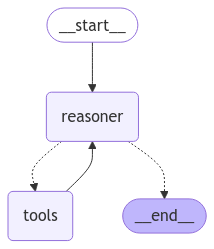

In [56]:
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [65]:
messages = [HumanMessage(content="what is 2 times of Messi's age?")]
messages = react_graph.invoke({"messages": messages})

In [66]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is 2 times of Messi's age?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_bx31)
 Call ID: call_bx31
  Args:
    query: Lionel Messi age
================================= Tool Message =================================
Name: duckduckgo_search

Lionel Messi is an Argentine football prodigy with mesmerizing skills and record-breaking achievements who has captivated fans worldwide as one of the greatest players in history. ... At age 13 Messi and his family relocated to Barcelona, and he began playing for FC Barcelona's under-14 team. He scored 21 goals in 14 games for the junior team ... Lionel Messi is one of the world's best soccer players and helped Argentina win the 2022 FIFA World Cup. Read about his teams, awards, wife, height, and more. ... At age 13, Messi signed with FC ... Age, they say, is just a number - an adage that app

In [69]:
messages = [HumanMessage(content="add Messi's age to the height of the eiffle tower")]
messages = react_graph.invoke({"messages": messages})

In [70]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add Messi's age to the height of the eiffle tower
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_mhz4)
 Call ID: call_mhz4
  Args:
    query: Lionel Messi age
================================= Tool Message =================================
Name: duckduckgo_search

Lionel Messi is an Argentine football prodigy with mesmerizing skills and record-breaking achievements who has captivated fans worldwide as one of the greatest players in history. ... At age 13 Messi and his family relocated to Barcelona, and he began playing for FC Barcelona's under-14 team. He scored 21 goals in 14 games for the junior team ... Lionel Messi is one of the world's best soccer players and helped Argentina win the 2022 FIFA World Cup. Read about his teams, awards, wife, height, and more. ... At age 13, Messi signed with FC ... Age, they say, is just a number -